In [ ]:
!pip install wordcloud

In [115]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from datetime import datetime

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from pymongo import MongoClient
from pymongo import TEXT
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Creating a connection to MongoDB
client = MongoClient('localhost', 27017)
db = client['news']
collection = db['elespectador']

In [168]:
# Creating a text index over all text fields
collection.create_index([('title', TEXT), ('summary', TEXT), ('full_text', TEXT)], default_language = 'spanish')

'title_text_summary_text_full_text_text'

In [169]:
# Collection obtained from database

# collection_db = list(collection.find({'author': 'Redacción Economía'}, {'_id': 0, 'datetime': 0, 'author': 0, 'relative_path': 0}))
# Termino de busqueda
collection_db = list(collection.find({'$text': {'$search': 'peligro'}}, {'_id': 0, 'summary': 1, 'title': 1, 'full_text': 1,}))

In [ ]:
# Removing stop words from collection
stop_words = set(stopwords.words("spanish"))

text = ''
filtered_words = []
for i in range(len(collection_db)):
    text += collection_db[i]["full_text"]
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = text.lower()
    text_array = text.split(' ')
    for w in text_array:
        if w not in stop_words:
            filtered_words.append(w)
    
print(filtered_words)


<FreqDist with 2059 samples and 12465 outcomes>


<BarContainer object of 30 artists>

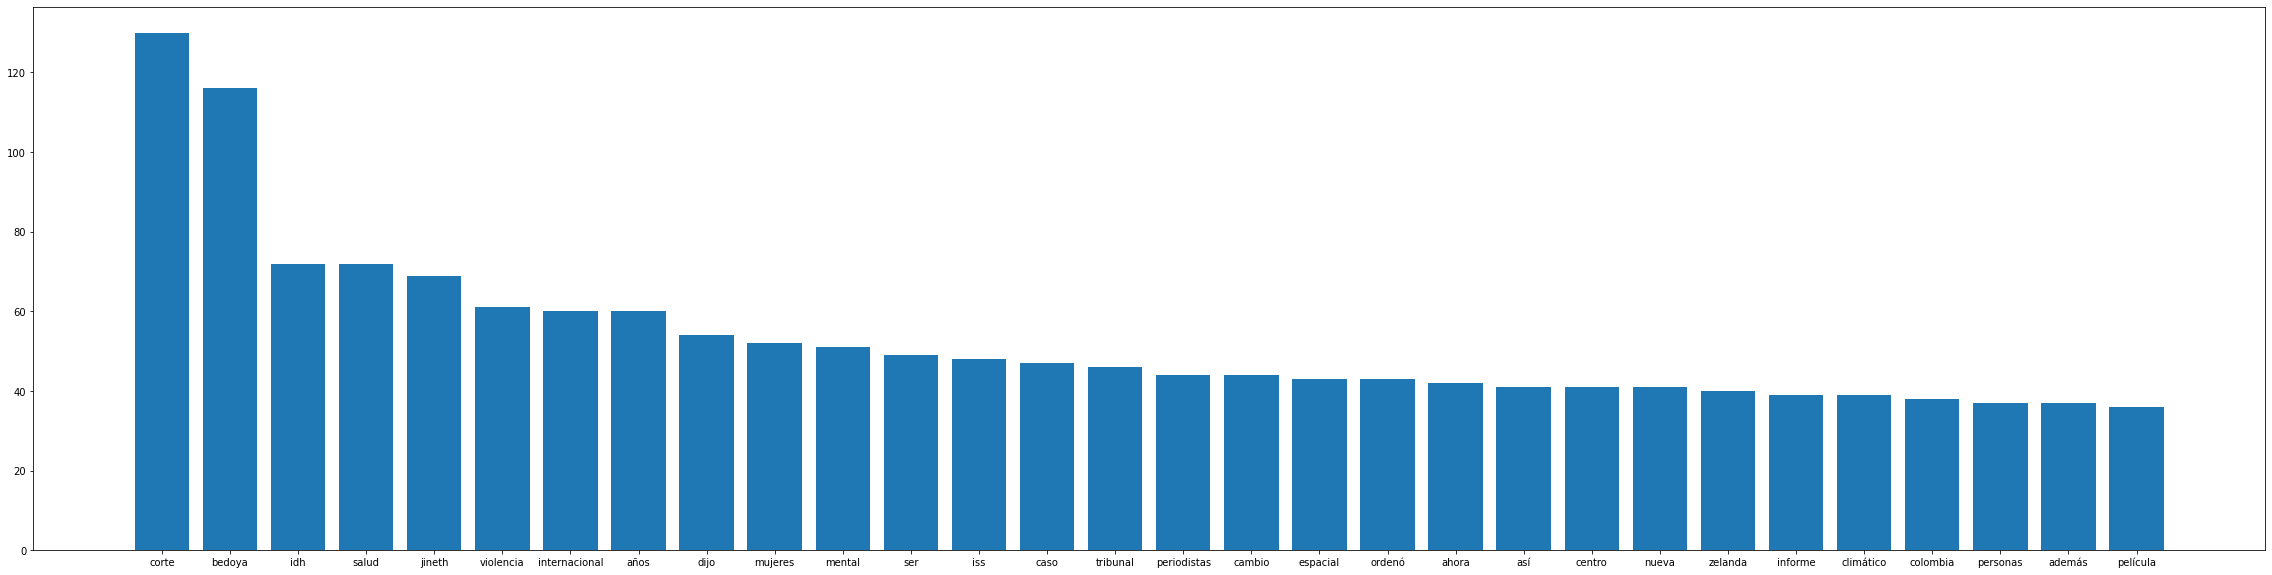

In [171]:
# Words frecuency
frec_dist = FreqDist(filtered_words)

print(frec_dist)

frec_dist.most_common(5)

n = 30
plt.figure(figsize = (40,10))
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])


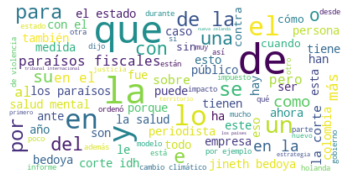

In [172]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
#-----------------------------------------------------------------------------#

In [173]:
# Collection obtained from database

# Semana a semana
collection_db2 = collection

In [190]:
from_date_range_A = datetime(2021, 10, 21)  # Format -> (yyyy, mm, dd)
to_date_range_A = datetime(2021, 10, 22)  # Format -> (yyyy, mm, dd)

from_date_range_B = datetime(2021, 10, 11)  # Format -> (yyyy, mm, dd)
to_date_range_B = datetime(2021, 10, 17)  # Format -> (yyyy, mm, dd)

collection_db3 = list(collection_db2.find({"datetime": {
    '$gte': from_date_range_A,
    '$lt': to_date_range_A
}}));

collection_db4 = list(collection_db2.find({"datetime": {
    '$gte': from_date_range_B,
    '$lt': to_date_range_B
}}));



In [192]:
# Removing stop words from collection
stop_words = set(stopwords.words("spanish"))

text = ''
filtered_words2 = []
for i in range(len(collection_db3)):
    text += collection_db3[i]["full_text"]
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = text.lower()
    text_array = text.split(' ')
    for w in text_array:
        if w not in stop_words:
            filtered_words2.append(w)

            
text2 = ''
filtered_words3 = []
for i in range(len(collection_db4)):
    text2 += collection_db4[i]["full_text"]
    text2 = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text2)
    text2 = text2.lower()
    text_array2 = text2.split(' ')
    for w in text_array2:
        if w not in stop_words:
            filtered_words3.append(w)
    

<FreqDist with 2534 samples and 33602 outcomes>
<FreqDist with 3808 samples and 86851 outcomes>


<BarContainer object of 30 artists>

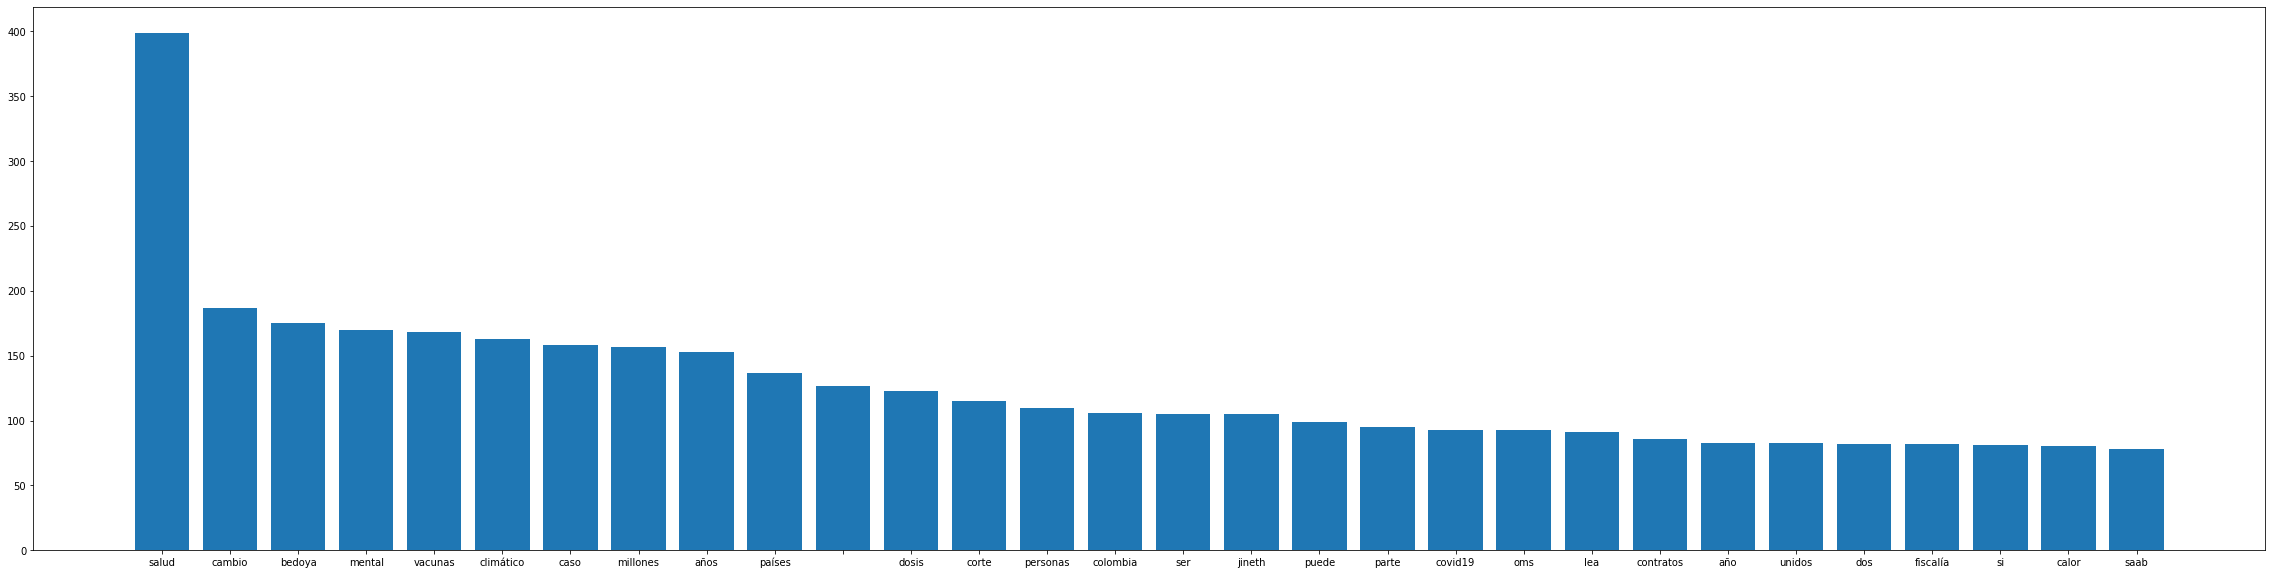

In [193]:
# Words frecuency
frec_dist = FreqDist(filtered_words2)
frec_dist2 = FreqDist(filtered_words3)

print(frec_dist)
print(frec_dist2)

frec_dist.most_common(5)
frec_dist2.most_common(5)


n = 30
plt.figure(figsize = (40,10))
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])


<BarContainer object of 30 artists>

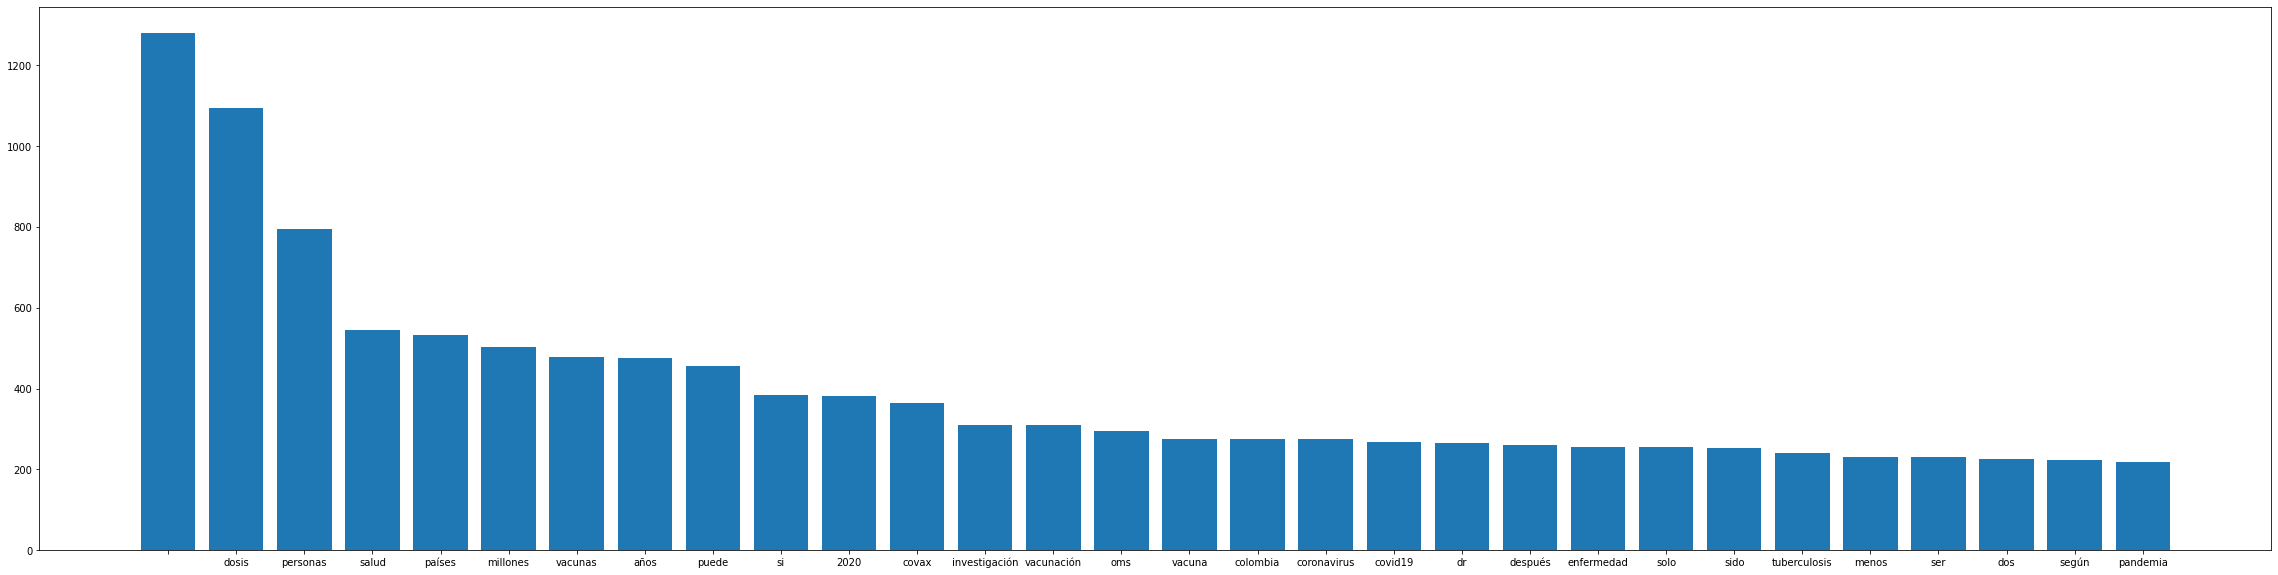

In [194]:
plt.figure(figsize = (40,10))
plt.bar([ w[0] for w in frec_dist2.most_common(n) ], [ w[1] for w in frec_dist2.most_common(n) ])

In [164]:
#-----------------------------------------------------------------------------#

In [239]:
# Collection obtained from database

# collection_db = list(collection.find({'author': 'Redacción Economía'}, {'_id': 0, 'datetime': 0, 'author': 0, 'relative_path': 0}))
# Categoria de temas
collection_db5 = list(collection.find({'relative_path': {'$regex' : '.*' + 'ciencia' + '.*'} }, {'_id': 0, 'summary': 1, 'title': 1, 'full_text': 1,}))

In [240]:
print(len(collection_db5))

30


In [241]:
# Removing stop words from collection
stop_words = set(stopwords.words("spanish"))

text5 = ''
filtered_words5 = []
for i in range(len(collection_db5)):
    text5 += collection_db5[i]["full_text"]
    text5 = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text5)
    text5 = text5.lower()
    text_array5 = text5.split(' ')
    for w in text_array5:
        if w not in stop_words:
            filtered_words5.append(w)

<FreqDist with 4242 samples and 156750 outcomes>


<BarContainer object of 30 artists>

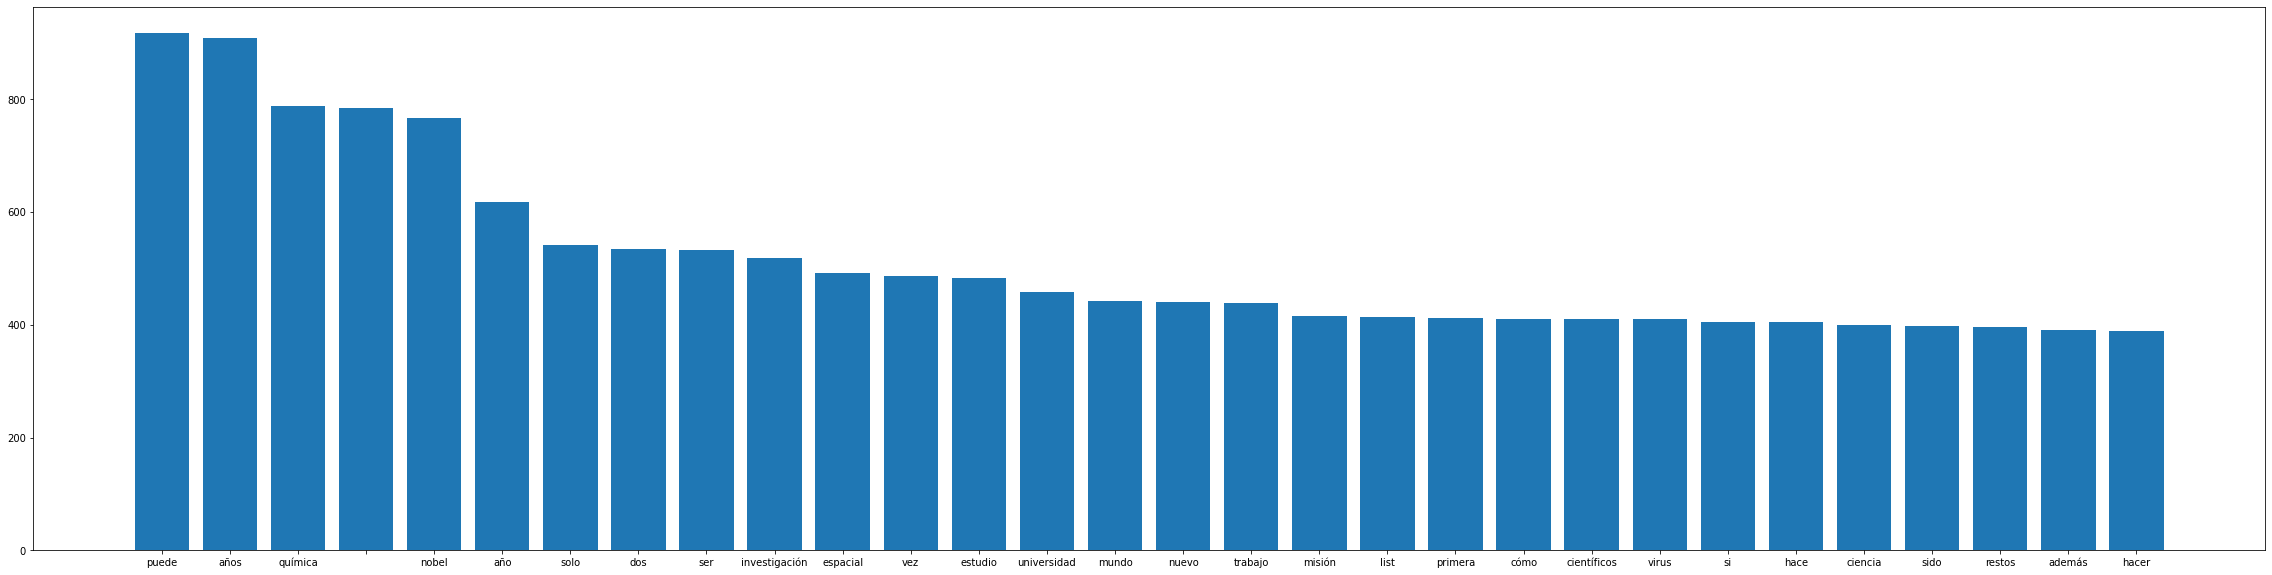

In [244]:
# Words frecuency
frec_dist5 = FreqDist(filtered_words5)

print(frec_dist5)

frec_dist5.most_common(5)

n = 30
plt.figure(figsize = (40,10))
plt.bar([ w[0] for w in frec_dist5.most_common(n) ], [ w[1] for w in frec_dist5.most_common(n) ])

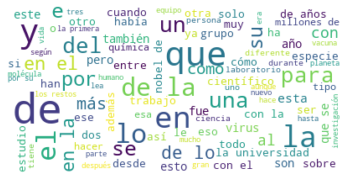

In [243]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text5)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
#-----------------------------------------------------------------------------#